In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from itertools import compress
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from tqdm import tqdm
import cupy as cp
from cupyx.scipy import ndimage
import pickle
import cv2
import os

# Experimental  data and unlabeled data

In [10]:
unlabeled_names = pickle.load(open("datasets/all_feat_names.txt", "rb"))

In [11]:
sigma200data = [item.endswith("200") for item in unlabeled_names]

In [12]:
unlabeled_feats = pickle.load(open("datasets/all_feats.txt", "rb"))

In [13]:
only200_feats = list(compress(unlabeled_feats, sigma200data))

In [14]:
only200_feats = np.vstack(only200_feats)

In [15]:
big_train = pd.read_csv("datasets/round_1/combined/big_train_df.csv")

In [16]:
d200, g200 = big_train.iloc[:, 0].values, big_train.iloc[:, 1].values
d400, g400 = big_train.iloc[:, 2].values, big_train.iloc[:, 3].values
d600, g600 = big_train.iloc[:, 4].values, big_train.iloc[:, 5].values
d800, g800 = big_train.iloc[:, 6].values, big_train.iloc[:, 7].values
d1000, g1000 = big_train.iloc[:, 8].values, big_train.iloc[:, 9].values

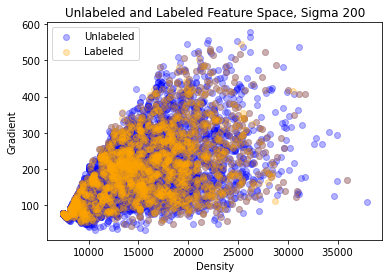

In [17]:
plt.scatter(only200_feats[:, 0], only200_feats[:, 1], c= "blue", alpha = 0.3, label = "Unlabeled")
plt.scatter(d200, g200, c = "orange", alpha = 0.3, label = "Labeled")
plt.title("Unlabeled and Labeled Feature Space, Sigma 200")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.legend()
plt.show()

# Experimental Data vs. Dipole

In [253]:
big_train = pd.read_csv("datasets/round_1/combined/big_train_df.csv")

In [254]:
d200, g200 = big_train.iloc[:, 0].values, big_train.iloc[:, 1].values
d400, g400 = big_train.iloc[:, 2].values, big_train.iloc[:, 3].values
d600, g600 = big_train.iloc[:, 4].values, big_train.iloc[:, 5].values
d800, g800 = big_train.iloc[:, 6].values, big_train.iloc[:, 7].values
d1000, g1000 = big_train.iloc[:, 8].values, big_train.iloc[:, 9].values

In [255]:
big_train.Dipole.values

array([0.65460437, 0.24628862, 0.08041617, ..., 0.12342591, 0.15050784,
       0.31845743])

In [256]:
np.max(big_train.Dipole.values)

1.4466198444226392

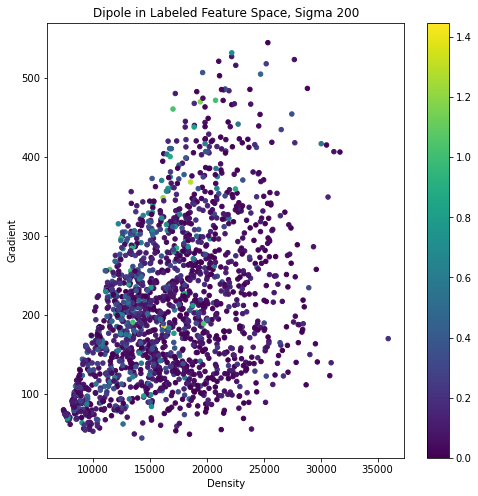

In [263]:
plt.figure(figsize=(8,8))
sc = plt.scatter(d200, g200, c = big_train.Dipole.values, s=20)
plt.colorbar(sc)
plt.title("Dipole in Labeled Feature Space, Sigma 200")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

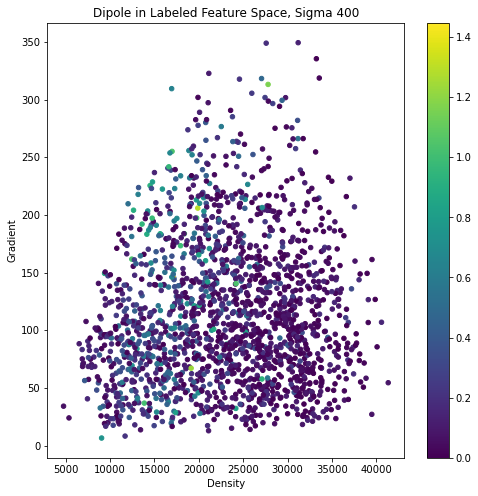

In [264]:
plt.figure(figsize=(8,8))
sc = plt.scatter(d400, g400, c = big_train.Dipole.values, s=20)
plt.colorbar(sc)
plt.title("Dipole in Labeled Feature Space, Sigma 400")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

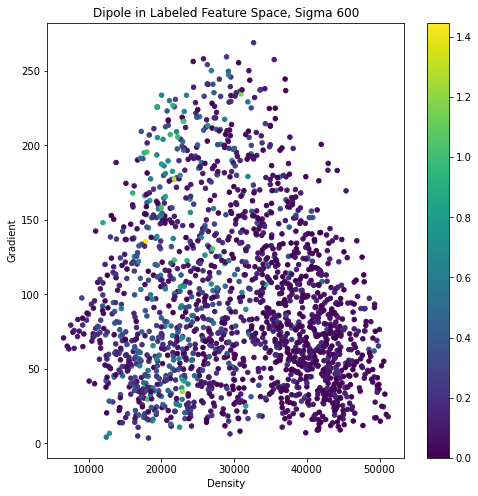

In [267]:
plt.figure(figsize=(8,8))
sc = plt.scatter(d600, g600, c = big_train.Dipole.values, s=20)
plt.colorbar(sc)
plt.title("Dipole in Labeled Feature Space, Sigma 600")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

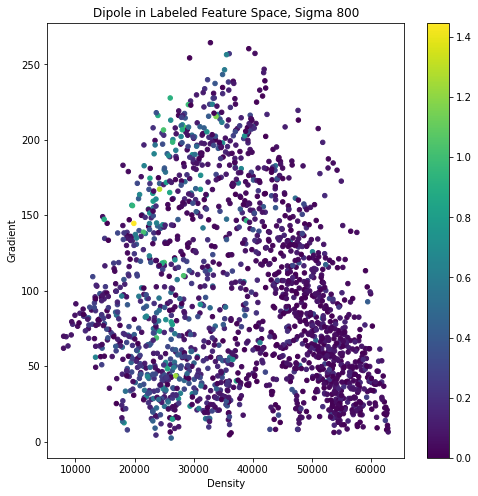

In [268]:
plt.figure(figsize=(8,8))
sc = plt.scatter(d800, g800, c = big_train.Dipole.values, s=20)
plt.colorbar(sc)
plt.title("Dipole in Labeled Feature Space, Sigma 800")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

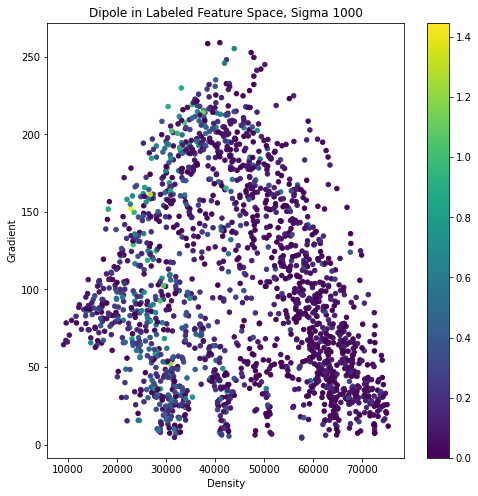

In [269]:
plt.figure(figsize=(8,8))
sc = plt.scatter(d1000, g1000, c = big_train.Dipole.values, s=20)
plt.colorbar(sc)
plt.title("Dipole in Labeled Feature Space, Sigma 1000")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

# Paired Data and Hexagons

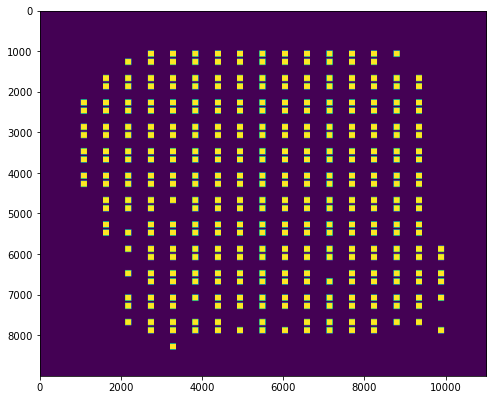

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# PAIRED ARRAY

b1 = np.ones((13,17))
b2 = np.ones((12,17))
res1_lo = np.argwhere(b1 == 1)
res2_lo = np.argwhere(b2 == 1)
res1_empty = np.array(
    [0,1,2,15,16,17,
     17*2-1,17*3-1,17*4-1,17*5-1,17*6-1,
     17*6,17*7-1,17*7,17*7+2,17*8-1,
     17*8,17*8+1,17*9,17*9+1,17*9+11,
     17*10,17*10+1,17*11,17*11+1,17*11+7,17*11+9,
     17*12-1,17*12,17*12+1,17*12+2,17*12+3,17*12+5,
     17*12+6,17*12+7,17*12+8,17*12+9,17*12+10,17*12+11,
     17*12+12,17*12+13,17*12+14,17*12+15,17*12+16])
res2_empty = np.array(
    [0,1,14,15,16,17,
     17*2-1,17*3-1,17*4-1,17*5-1,17*6-1,
     17*6,17*6+4,17*7-1,17*7,17*8-1,
     17*8,17*8+1,17*8+2,17*9,17*9+1,17*9+2,
     17*10,17*10+1,17*10+5,17*11-1,17*11,17*11+1,
     17*11+2,17*11+14,17*11+15])

res1_lo = np.delete(res1_lo, res1_empty, axis=0)
res2_lo = np.delete(res2_lo, res2_empty, axis=0)

res1 = np.array([np.array([yi*600, xi*550])+1000 for yi, xi in res1_lo])
res2 = np.array([np.array([yi*600, xi*550])+1000 for yi, xi in res2_lo])

im = np.zeros((9000, 11000))
centroids = []
for k in range(res1.shape[0]):
    y, x = res1[k][0], res1[k][1]
    im[y:y+150,x:x+150] = 255
    centroids.append((y+75, x+75))
for k in range(res2.shape[0]):
    y, x = res2[k][0], res2[k][1]
    im[y+200:y+350,x:x+150] = 255
    centroids.append((y+275, x+75))
    
plt.figure(figsize=(8,8))
plt.imshow(im)
plt.show()

In [22]:
centroids

[(1075, 2725),
 (1075, 3275),
 (1075, 3825),
 (1075, 4375),
 (1075, 4925),
 (1075, 5475),
 (1075, 6025),
 (1075, 6575),
 (1075, 7125),
 (1075, 7675),
 (1075, 8225),
 (1075, 8775),
 (1675, 1625),
 (1675, 2175),
 (1675, 2725),
 (1675, 3275),
 (1675, 3825),
 (1675, 4375),
 (1675, 4925),
 (1675, 5475),
 (1675, 6025),
 (1675, 6575),
 (1675, 7125),
 (1675, 7675),
 (1675, 8225),
 (1675, 8775),
 (1675, 9325),
 (2275, 1075),
 (2275, 1625),
 (2275, 2175),
 (2275, 2725),
 (2275, 3275),
 (2275, 3825),
 (2275, 4375),
 (2275, 4925),
 (2275, 5475),
 (2275, 6025),
 (2275, 6575),
 (2275, 7125),
 (2275, 7675),
 (2275, 8225),
 (2275, 8775),
 (2275, 9325),
 (2875, 1075),
 (2875, 1625),
 (2875, 2175),
 (2875, 2725),
 (2875, 3275),
 (2875, 3825),
 (2875, 4375),
 (2875, 4925),
 (2875, 5475),
 (2875, 6025),
 (2875, 6575),
 (2875, 7125),
 (2875, 7675),
 (2875, 8225),
 (2875, 8775),
 (2875, 9325),
 (3475, 1075),
 (3475, 1625),
 (3475, 2175),
 (3475, 2725),
 (3475, 3275),
 (3475, 3825),
 (3475, 4375),
 (3475, 49

In [23]:
def extract_features(image, sigma, centroids):

    im_blur = ndimage.gaussian_filter(cp.array(image), sigma=sigma, mode='constant',cval=0)
    im_blur_norm=im_blur*sigma*cp.sqrt(np.pi)

    im_sx = ndimage.sobel(im_blur_norm, axis=1, mode='reflect')
    im_sy = ndimage.sobel(im_blur_norm, axis=0, mode='reflect')
    im_sobel=np.hypot(im_sx, im_sy)

    feats = []
    
    for centroid in centroids:
        x, y = centroid[0], centroid[1]
        density = cp.mean(im_blur_norm[x-75: x+75, y-75: y+75])
        grad = cp.mean(im_sobel[x-75: x+75, y-75: y+75])
        feats.append([density.get(), grad.get()])

    mempool = cp.get_default_memory_pool()
    pinned_mempool = cp.get_default_pinned_memory_pool()

    mempool.free_all_blocks()
    pinned_mempool.free_all_blocks()

    feats = np.array(feats)
    return feats

In [24]:
yo = []
for sigma in [200,400,600,800,1000]:
    yo.append(extract_features(im, sigma, centroids))

In [25]:
paired = pd.DataFrame(np.hstack(yo))

In [26]:
paired

,0,1,2,3,4,5,6,7,8,9
0,12735.010344,212.690306,15558.607039,187.818356,20486.259326,193.970665,25423.165494,194.247333,30211.557827,192.612409
1,12967.685466,207.968732,17215.845403,181.230999,22792.549732,190.590435,28138.968308,193.411289,33303.423755,193.711094
2,12967.685466,207.968732,17314.486946,181.147945,23362.020178,190.135815,29228.110545,193.070494,34868.814707,193.999151
3,12967.685466,207.968732,17314.915421,181.147954,23428.558208,190.131554,29524.071233,193.081587,35494.199158,194.198233
4,12967.685466,207.968732,17314.915421,181.147954,23432.002294,190.131474,29576.485418,193.088185,35687.252980,194.283487
...,...,...,...,...,...,...,...,...,...,...
345,12820.249212,206.077166,15921.009765,171.475412,21582.103404,180.066254,27401.252398,182.971046,33228.697673,185.497683
346,12967.685466,207.968732,17217.578578,179.681033,22702.550974,182.694773,28036.229010,183.465729,33452.473012,185.391966
347,12967.685466,207.968732,17211.897434,180.953585,22678.330307,186.504427,27861.005646,186.253927,32978.940533,186.018592
348,12735.010344,212.690306,15645.815547,187.315060,21017.284685,191.748098,26354.229201,189.368358,31268.979487,185.641877


(array([  5.,   4.,  21., 248.,  38.,   1.,   0.,   1.,   8.,  24.]),
 array([ 60. ,  75.3,  90.6, 105.9, 121.2, 136.5, 151.8, 167.1, 182.4,
        197.7, 213. ]),
 <BarContainer object of 10 artists>)

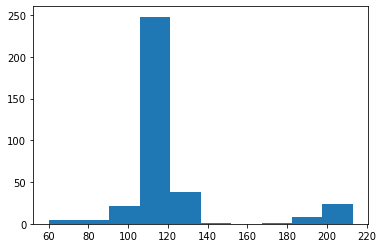

In [27]:
plt.hist(np.round(paired.iloc[:,1],0))

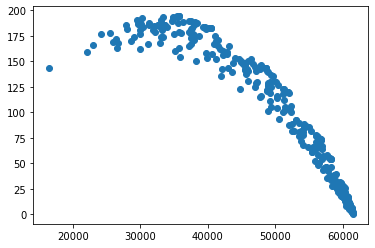

In [28]:
plt.scatter(paired.iloc[:, 8].values, paired.iloc[:,9].values)

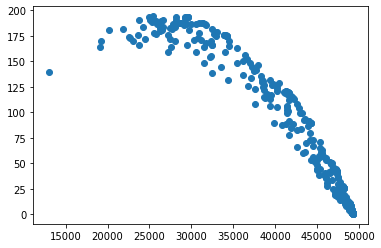

In [29]:
plt.scatter(paired.iloc[:, 6].values, paired.iloc[:,7].values)

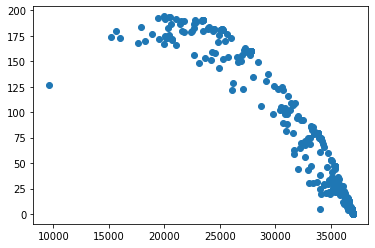

In [30]:
plt.scatter(paired.iloc[:, 4].values, paired.iloc[:,5].values)

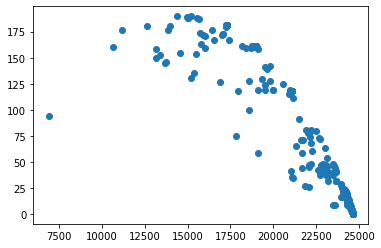

In [31]:
plt.scatter(paired.iloc[:, 2].values, paired.iloc[:,3].values)

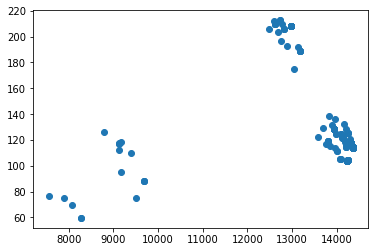

In [32]:
plt.scatter(paired.iloc[:, 0].values, paired.iloc[:,1].values)


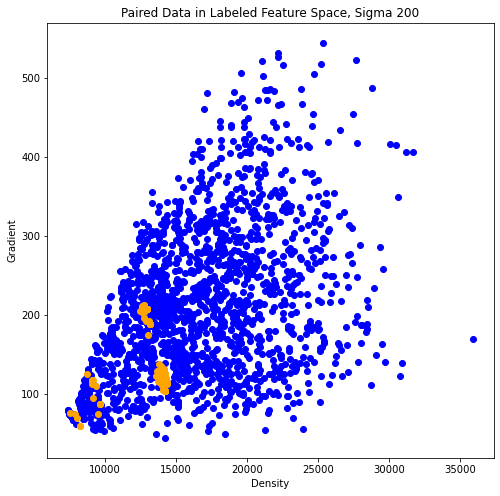

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(d200, g200, c = "blue")
plt.scatter(paired.iloc[:, 0].values, paired.iloc[:,1].values, c = "orange")
plt.title("Paired Data in Labeled Feature Space, Sigma 200")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

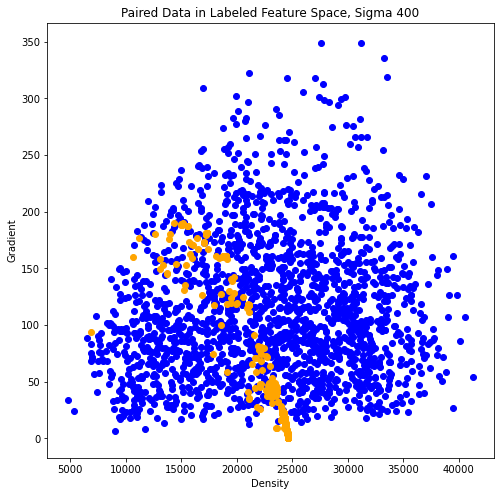

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(d400, g400, c = "blue")
plt.scatter(paired.iloc[:, 2].values, paired.iloc[:,3].values, c = "orange")
plt.title("Paired Data in Labeled Feature Space, Sigma 400")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

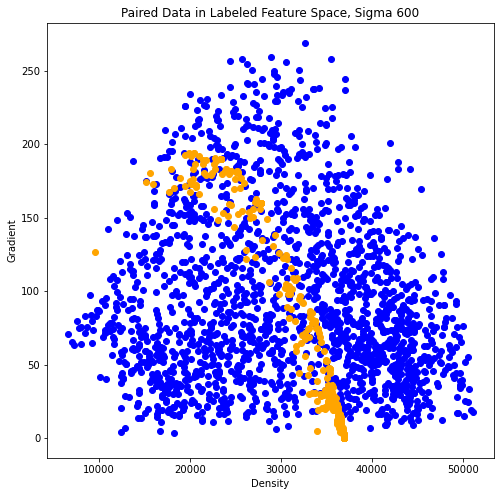

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(d600, g600, c = "blue")
plt.scatter(paired.iloc[:, 4].values, paired.iloc[:,5].values, c = "orange")
plt.title("Paired Data in Labeled Feature Space, Sigma 600")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

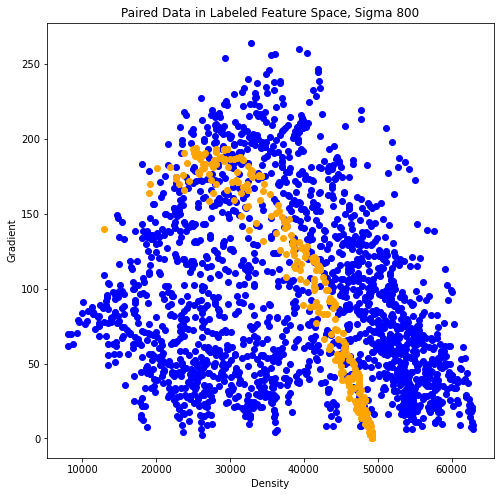

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(d800, g800, c = "blue")
plt.scatter(paired.iloc[:, 6].values, paired.iloc[:,7].values, c = "orange")
plt.title("Paired Data in Labeled Feature Space, Sigma 800")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

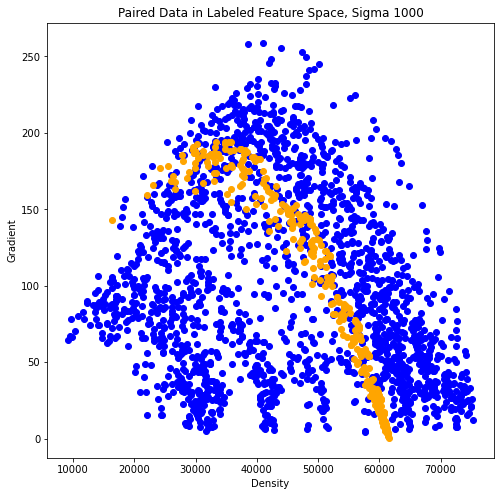

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(d1000, g1000, c = "blue")
plt.scatter(paired.iloc[:, 8].values, paired.iloc[:,9].values, c = "orange")
plt.title("Paired Data in Labeled Feature Space, Sigma 1000")
plt.xlabel("Density")
plt.ylabel("Gradient")
plt.show()

# Morphology and Dipoles of Unlabeled Data

In [48]:
# fixed combine! Now onto dipole over morphology

In [ ]:
# 1 -> 2
# 

In [330]:
df1 = pd.read_csv("datasets/round_1/combined/big_df1.csv")
morphDir = "datasets/round_1/rawData/morphology"

In [331]:
img = cv2.imread(os.path.join(morphDir, 'round1_01_segmented_removed_aligned.tiff'), 0)

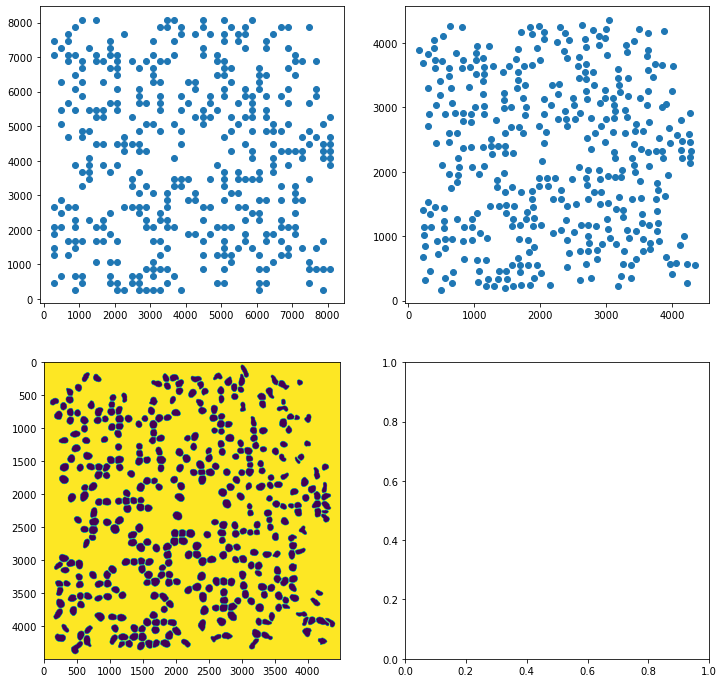

In [332]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12, 12)
axs[0, 0].scatter(df1.dx, df1.dy)
axs[0, 1].scatter(df1.fx, df1.fy)
axs[1, 0].imshow(cv2.flip(img, 0))

In [333]:
np.all(df1[["fx","fy"]].values == df1[["Centroid_x","Centroid_y"]].values)

True

In [334]:
df1.columns

Index(['dx', 'dy', 'fx', 'fy', 'd200', 'g200', 'd400', 'g400', 'd600', 'g600',
       'd800', 'g800', 'd1000', 'g1000', 'Dipole', 'Elongation',
       'Aspect_Ratio', 'Centroid_x', 'Centroid_y', 'Diff_of_means',
       'CDX2_1 Marker', 'CDX2_2 Marker', 'Minor Axis', 'Skeleton'],
      dtype='object')

In [344]:
yo = df1.sort_values(by="Dipole", ascending=False)
yo[(yo.Centroid_x < 450) & (yo.Centroid_x > 400)]

,dx,dy,fx,fy,d200,g200,d400,g400,d600,g600,...,Dipole,Elongation,Aspect_Ratio,Centroid_x,Centroid_y,Diff_of_means,CDX2_1 Marker,CDX2_2 Marker,Minor Axis,Skeleton
68,675.0,1675.0,429.0,920.0,20904.317498,249.218915,31627.145125,97.903899,37474.970546,125.547064,...,0.337798,86.0,1.234234,429,920,-0.490150,0.426204,0.044615,98.577336,99.911688
50,675.0,1275.0,446.0,729.0,14638.298911,278.791820,25285.970561,148.219782,33119.432957,151.760986,...,0.108935,47.0,0.753425,446,729,-0.383205,0.391017,0.097837,105.614144,48.071068
218,675.0,4675.0,422.0,2443.0,10177.023663,157.840169,15626.935313,201.020301,23318.860325,212.042975,...,0.098678,33.0,0.885714,422,2443,-0.449174,0.482206,0.079873,122.061390,39.455844
268,675.0,5675.0,414.0,3034.0,15089.136664,163.122566,21573.958828,167.433623,28689.937019,199.594951,...,0.047152,17.0,0.892308,414,3034,-0.536163,0.492179,0.042265,124.023435,18.485281
124,675.0,2675.0,408.0,1450.0,20164.924520,145.469071,24756.354969,161.764756,30348.748273,160.394542,...,0.038777,48.0,1.149123,408,1450,-0.540026,0.439425,0.031719,106.104662,53.627417


In [ ]:
yo[yo]

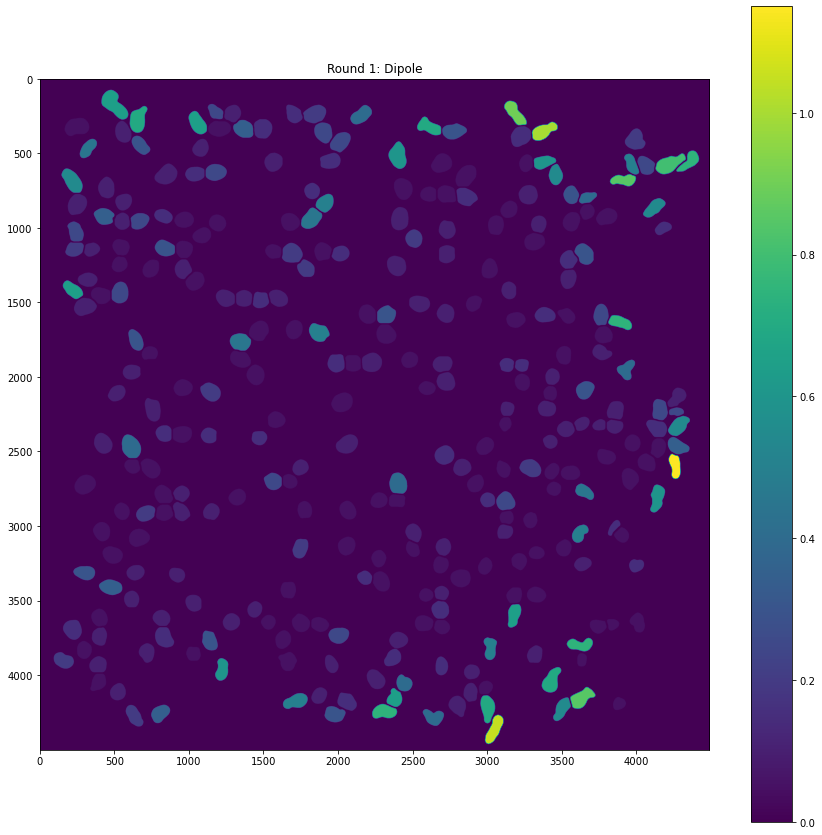

In [336]:
# Grayscale8
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find Canny edges
edged = cv2.Canny(img, 30, 200)
#Find contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros_like(img)
n = len(df1.Dipole.values)
fCentroids = df1[["Centroid_x", "Centroid_y"]].values

for i,c in enumerate(contours):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    centroid = np.array([cX,cY])
    tiled = np.tile(centroid, (n,1))
    norm = np.linalg.norm(fCentroids - tiled, axis = 1)
    ix = np.argmin(norm)
    cv2.drawContours(mask, contours, i, df1.Dipole.values[ix]*20, -1)

plt.figure(figsize=(15,15))
cmap = plt.cm.get_cmap("viridis")
#cmap.set_bad(color = 'k', alpha = 1)
plt.imshow(mask/20, cmap=cmap)#,
plt.colorbar()
plt.title("Round 1: Dipole")
plt.show()
#plt.xticks([])
#plt.yticks([])
#plt.savefig("sample.pdf", dpi=300)

In [63]:
np.unique(df1[["Centroid_x", "Centroid_y"]].values, axis = 0).shape

(392, 2)

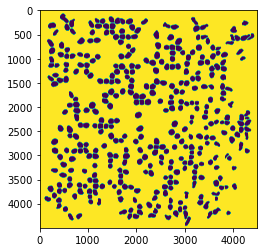

In [9]:
plt.imshow(img)

In [4]:
img.shape

(4500, 4491)

In [11]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
df1 = pd.read_csv("datasets/round_1/combined/big_df1.csv")

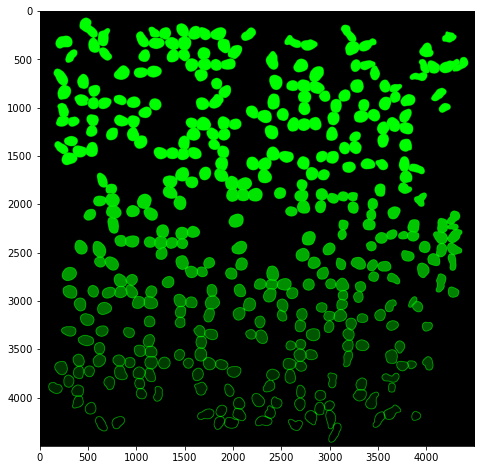

In [36]:
img = cv2.imread('round1_01_segmented_removed_aligned.tiff',0) 
mask = np.zeros((img.shape[0],img.shape[1],3), np.uint8)

edged = cv2.Canny(img, 30, 200)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

## Draw 
ya = []
for i, c in enumerate(contours):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    ya.append((cX,cY))
    yeet.append((cY,cX))

    cv2.drawContours(mask, contours, i, (0,255,0), 10)
    cv2.drawContours(mask, contours, i, (0,i,0), -1)

plt.figure(figsize=(8,8))
plt.imshow(mask)

In [37]:
cent1 = df1[["Centroid_x", "Centroid_y"]].values

In [38]:
coords = np.array(ya)

In [46]:
coords[295]
diff_sum = np.sum(cent1 - coords[295], axis = 1)
ix = np.where(diff_sum == 0)

In [50]:
cent1[92], cent1[42]

(array([ 346, 1142]), array([ 346, 1142]))

In [49]:
diff_sum[92]

0

In [53]:
df1.iloc[92,:]

dx                 475.000000
dy                2075.000000
fx                 346.000000
fy                1142.000000
d200             19419.045158
g200               123.413597
d400             29640.880211
g400               165.459838
d600             34369.360259
g600               178.480149
d800             37257.447539
g800               173.759198
d1000            40307.254074
g1000              173.958729
Dipole               0.090540
Elongation          20.000000
Aspect_Ratio         1.127660
Centroid_x         346.000000
Centroid_y        1142.000000
Diff_of_means       -0.317677
CDX2_1 Marker        0.429126
CDX2_2 Marker        0.137770
Minor Axis          76.644847
Skeleton            23.142136
Name: 92, dtype: float64

In [54]:
df1.iloc[42, :]

dx                1475.000000
dy                1075.000000
fx                 847.000000
fy                 641.000000
d200              9386.562779
g200               108.480067
d400             20982.844996
g400                45.708973
d600             34246.285451
g600                67.920549
d800             43634.195759
g800               102.966970
d1000            50036.764038
g1000              133.517182
Dipole               0.090540
Elongation          20.000000
Aspect_Ratio         1.127660
Centroid_x         346.000000
Centroid_y        1142.000000
Diff_of_means       -0.317677
CDX2_1 Marker        0.429126
CDX2_2 Marker        0.137770
Minor Axis          76.644847
Skeleton            23.142136
Name: 42, dtype: float64

In [48]:
diff_sum[42]

0

In [47]:
ix

(array([42, 92]),)

In [56]:
df1.shape

(392, 24)

In [55]:
coords.shape

(392, 2)

In [44]:
dipoles = []
for i, c in enumerate(coords):
    diff_sum = np.sum(cent1 - c, axis = 1)
    ix = np.where(diff_sum == 0)
    print(i, ix)
    #if not np.all(cent1[ix] == coord):
     #   print(cent1[ix], coord)

0 (array([391]),)
1 (array([390]),)
2 (array([388]),)
3 (array([387]),)
4 (array([385]),)
5 (array([386]),)
6 (array([389]),)
7 (array([382]),)
8 (array([384]),)
9 (array([380]),)
10 (array([381]),)
11 (array([376]),)
12 (array([378]),)
13 (array([379]),)
14 (array([377]),)
15 (array([383]),)
16 (array([375]),)
17 (array([372]),)
18 (array([373]),)
19 (array([371]),)
20 (array([368]),)
21 (array([370]),)
22 (array([366]),)
23 (array([369]),)
24 (array([374]),)
25 (array([364]),)
26 (array([365]),)
27 (array([360]),)
28 (array([367]),)
29 (array([363]),)
30 (array([359]),)
31 (array([362]),)
32 (array([357]),)
33 (array([358]),)
34 (array([361]),)
35 (array([354]),)
36 (array([115, 353]),)
37 (array([356]),)
38 (array([281, 352]),)
39 (array([164, 351]),)
40 (array([350]),)
41 (array([355]),)
42 (array([349]),)
43 (array([348]),)
44 (array([345]),)
45 (array([346]),)
46 (array([344]),)
47 (array([347]),)
48 (array([341]),)
49 (array([343]),)
50 (array([342]),)
51 (array([336]),)
52 (arr

In [4]:
len(contours)

392